# ELO Kaggle - Data Exploration Analysis

In [1]:
import pandas as pd
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

### Dataset Exploration

In [2]:
!ls data/

Data_Dictionary.xlsx	     new_merchant_transactions.csv  train.csv
historical_transactions.csv  sample_submission.csv
merchants.csv		     test.csv


So we are given the above files. The description of the files are:
* `train.csv` - the training set
* `test.csv` - the test set
* `sample_submission.csv` - a sample submission file in the correct format - contains all card_ids you are expected to      predict for.
* `historical_transactions.csv` - up to 3 months' worth of historical transactions for each card_id
* `merchants.csv` - additional information about all merchants / merchant_ids in the dataset.
* `new_merchant_transactions.csv` - two months' worth of data for each card_id containing ALL purchases that card_id made at merchant_ids that were not visited in the historical data.


In [3]:
train_df = pd.read_csv("data/train.csv", parse_dates=["first_active_month"])

In [4]:
test_df = pd.read_csv("data/test.csv", parse_dates=["first_active_month"])

In [5]:
print("Number of rows and columns in train set : ",train_df.shape)
print("Number of rows and columns in test set : ",test_df.shape)

Number of rows and columns in train set :  (201917, 6)
Number of rows and columns in test set :  (123623, 5)


In [6]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [7]:
test_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1


In [8]:
num_indexes = train_df.shape[0]
target_col  = 'target'

Text(0, 0.5, 'Loyalty Score')

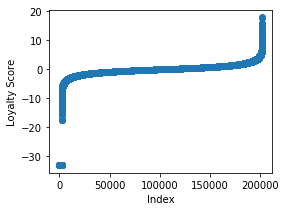

In [9]:
plt.figure(figsize=(4,3))
plt.scatter(range(train_df.shape[0]), np.sort(train_df[target_col].values))
plt.xlabel("Index", fontsize = 10)
plt.ylabel("Loyalty Score", fontsize = 10)

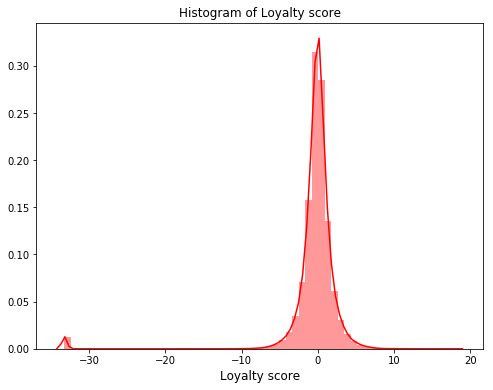

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(train_df[target_col].values, bins=60, kde=True, color="red")
plt.title("Histogram of Loyalty score")
plt.xlabel('Loyalty score', fontsize=12)
plt.show()

Investigate the loyalty scores that are outliers. (Here less than -30 score). Their count:

In [11]:
(train_df[target_col]<-30).sum()

2207

In [12]:
cnt_srs = train_df['first_active_month'].dt.date.value_counts()

`dt.date` Returns numpy array of python datetime.date objects 

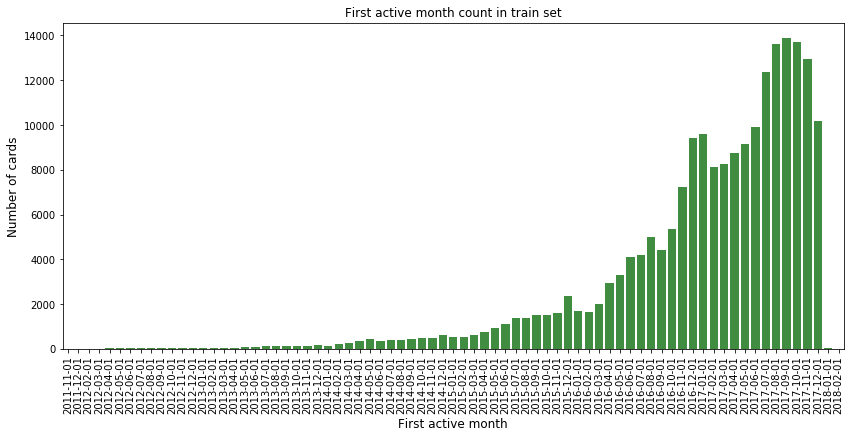

In [13]:
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()

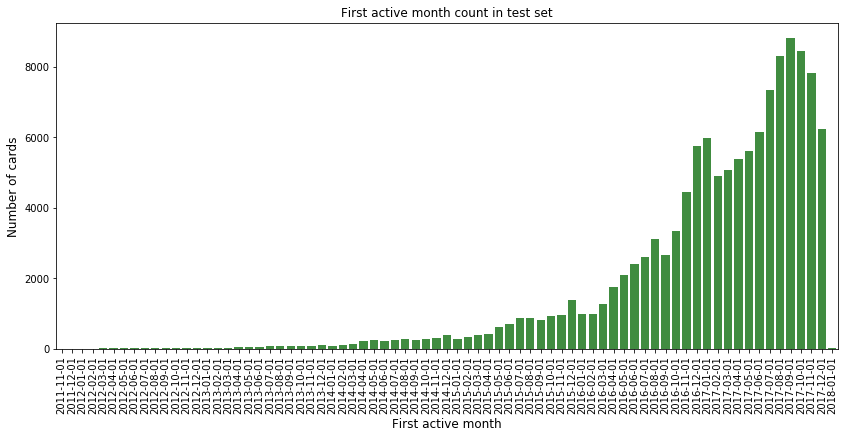

In [15]:
cnt_srs = test_df['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in test set")
plt.show()

# VIOLIN PLOT

Violin plots are similar to box plots, except that they also show the probability density of the data at different values (in the simplest case this could be a histogram). Typically violin plots will include a marker for the median of the data and a box indicating the interquartile range, as in standard box plots. Overlaid on this box plot is a kernel density estimation. Like box plots, violin plots are used to represent comparison of a variable distribution (or sample distribution) across different "categories" (for example, temperature distribution compared between day and night, or distribution of car prices compared across different car makers). 

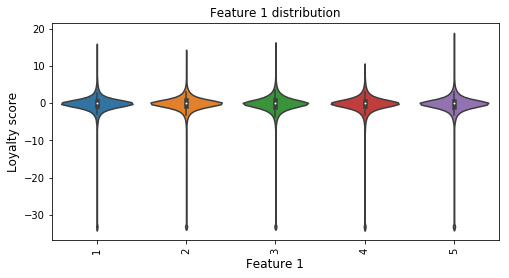

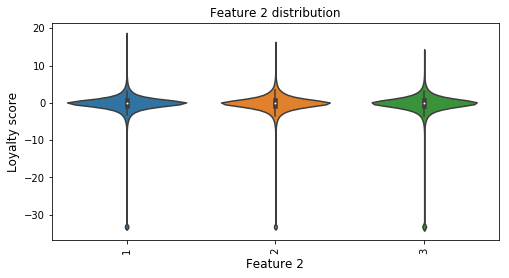

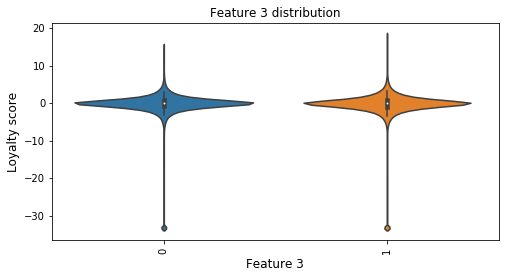

In [16]:
# feature 1
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_1", y=target_col, data=train_df)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()

# feature 2
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_2", y=target_col, data=train_df)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 2 distribution")
plt.show()

# feature 3
plt.figure(figsize=(8,4))
sns.violinplot(x="feature_3", y=target_col, data=train_df)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 3', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Feature 3 distribution")
plt.show()
